In [252]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from datetime import datetime
import datetime
from scipy import stats

In [278]:
data = pd.read_csv("data_task.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                2115 non-null   object 
 1   shown               2115 non-null   int64  
 2   clicked             2115 non-null   int64  
 3   converted           2115 non-null   int64  
 4   avg_cost_per_click  2115 non-null   float64
 5   total_revenue       2115 non-null   float64
 6   ad                  2115 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 115.8+ KB


In [ ]:
data[(data['date'] == "2015-10-01")].sort_values(["shown"], ascending =False).head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad
1956,2015-10-01,171855,10977,78,1.42,1806.32,ad_group_38
635,2015-10-01,162075,14470,1389,1.81,35232.44,ad_group_13
106,2015-10-01,148198,13842,47,2.69,1103.29,ad_group_3
1267,2015-10-01,146682,618,0,0.72,0.00,ad_group_25
1004,2015-10-01,129414,7441,381,1.65,5335.52,ad_group_20


In [ ]:
data[(data['date'] == "2015-10-01")].sort_values(["clicked"], ascending =False).head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad
635,2015-10-01,162075,14470,1389,1.81,35232.44,ad_group_13
106,2015-10-01,148198,13842,47,2.69,1103.29,ad_group_3
1956,2015-10-01,171855,10977,78,1.42,1806.32,ad_group_38
1004,2015-10-01,129414,7441,381,1.65,5335.52,ad_group_20
159,2015-10-01,76786,7383,408,2.82,8392.27,ad_group_4


In [ ]:
data[(data['date'] == "2015-10-01")].sort_values(["converted"], ascending =False).head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad
635,2015-10-01,162075,14470,1389,1.81,35232.44,ad_group_13
899,2015-10-01,75128,7169,539,1.93,8432.53,ad_group_18
159,2015-10-01,76786,7383,408,2.82,8392.27,ad_group_4
1004,2015-10-01,129414,7441,381,1.65,5335.52,ad_group_20
1903,2015-10-01,64526,4803,257,1.80,4186.65,ad_group_37


In [ ]:
data[(data['date'] == "2015-10-01")].sort_values(["total_revenue"], ascending =False).head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad
635,2015-10-01,162075,14470,1389,1.81,35232.44,ad_group_13
899,2015-10-01,75128,7169,539,1.93,8432.53,ad_group_18
159,2015-10-01,76786,7383,408,2.82,8392.27,ad_group_4
1004,2015-10-01,129414,7441,381,1.65,5335.52,ad_group_20
1320,2015-10-01,58332,6256,255,2.62,5138.64,ad_group_26


In [267]:
data['date'] = pd.to_datetime(data['date'])
  
print(data.describe())

               shown       clicked    converted  avg_cost_per_click  \
count    2115.000000   2115.000000  2115.000000         2115.000000   
mean    68299.844444   3056.077069   126.453901            1.373749   
std     48884.821409   3783.579969   233.420826            0.754331   
min         0.000000      0.000000     0.000000            0.000000   
25%     28030.500000    744.000000    18.000000            0.760000   
50%     54029.000000   1392.000000    41.000000            1.400000   
75%     97314.500000   3366.500000   103.000000            1.920000   
max    192507.000000  20848.000000  1578.000000            4.190000   

       total_revenue  
count    2115.000000  
mean     1966.517589  
std      3942.018757  
min      -200.150000  
25%       235.470000  
50%       553.300000  
75%      1611.495000  
max     39623.710000  


In [38]:
data.dtypes

date                   object
shown                   int64
clicked                 int64
converted               int64
avg_cost_per_click    float64
total_revenue         float64
ad                     object
dtype: object

In [268]:
data_c = data.copy()#datayı kopyaladım

In [6]:
data_c.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad
0,2015-10-01,65877,2339,43,0.90,641.62,ad_group_1
1,2015-10-02,65100,2498,38,0.94,756.37,ad_group_1
2,2015-10-03,70658,2313,49,0.86,970.90,ad_group_1
3,2015-10-04,69809,2833,51,1.01,907.39,ad_group_1
4,2015-10-05,68186,2696,41,1.00,879.45,ad_group_1


In [101]:
d1=pd.DataFrame((data["total_revenue"]-(data["clicked"].values*data["avg_cost_per_click"])),columns=["total"])
data_c=pd.concat([data_c,d1],axis=1)
data_c.head() #maliyeti hesaplayıp total adıyla ekledim

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,click_I,converted_I,total
0,2015-10-01,65877,2339,43,0.90,641.62,1,0.035506,0.000653,-1463.48
1,2015-10-02,65100,2498,38,0.94,756.37,1,0.038372,0.000584,-1591.75
2,2015-10-03,70658,2313,49,0.86,970.90,1,0.032735,0.000693,-1018.28
3,2015-10-04,69809,2833,51,1.01,907.39,1,0.040582,0.000731,-1953.94
4,2015-10-05,68186,2696,41,1.00,879.45,1,0.039539,0.000601,-1816.55


In [8]:
data_c.isnull().sum()
#eksik değer yok

date                  0
shown                 0
clicked               0
converted             0
avg_cost_per_click    0
total_revenue         0
ad                    0
total                 0
dtype: int64

In [213]:
def date_replace():
    for i in range(0,len(data_c["ad"])):    #linear regression denediğimde ad kolonu object tipinde olduğu için hata aldım
        if(data_c["ad"][i] == "ad_group_1"):#bu yüzden 1 2 3... şeklinde reklam grup isimlerini değiştiriyorum burda
            data_c["ad"][i] = 1
        elif(data_c["ad"][i] == "ad_group_2"):
            data_c["ad"][i] = 2
        elif(data_c["ad"][i] == "ad_group_3"):
            data_c["ad"][i] = 3
        elif(data_c["ad"][i] == "ad_group_4"):
            data_c["ad"][i] = 4
        elif(data_c["ad"][i] == "ad_group_5"):
            data_c["ad"][i] = 5
        elif(data_c["ad"][i] == "ad_group_6"):
            data_c["ad"][i] = 6
        elif(data_c["ad"][i] == "ad_group_7"):
            data_c["ad"][i] = 7
        elif(data_c["ad"][i] == "ad_group_8"):
            data_c["ad"][i] = 8
        elif(data_c["ad"][i] == "ad_group_9"):
            data_c["ad"][i] = 9
        elif(data_c["ad"][i] == "ad_group_10"):
            data_c["ad"][i] = 10
        elif(data_c["ad"][i] == "ad_group_11"):
            data_c["ad"][i] = 11    
        elif(data_c["ad"][i] == "ad_group_12"):
            data_c["ad"][i] = 12
        elif(data_c["ad"][i] == "ad_group_13"):
            data_c["ad"][i] = 13
        elif(data_c["ad"][i] == "ad_group_14"):
            data_c["ad"][i] = 14
        elif(data_c["ad"][i] == "ad_group_15"):
            data_c["ad"][i] = 15
        elif(data_c["ad"][i] == "ad_group_16"):
            data_c["ad"][i] = 16
        elif(data_c["ad"][i] == "ad_group_17"):
            data_c["ad"][i] = 17
        elif(data_c["ad"][i] == "ad_group_18"):
            data_c["ad"][i] = 18
        elif(data_c["ad"][i] == "ad_group_19"):
            data_c["ad"][i] = 19
        elif(data_c["ad"][i] == "ad_group_20"):
            data_c["ad"][i] = 20
        elif(data_c["ad"][i] == "ad_group_21"):
            data_c["ad"][i] = 21   
        if(data_c["ad"][i] == "ad_group_22"):
            data_c["ad"][i] = 22
        elif(data_c["ad"][i] == "ad_group_23"):
            data_c["ad"][i] = 23
        elif(data_c["ad"][i] == "ad_group_24"):
            data_c["ad"][i]= 24
        elif(data_c["ad"][i] == "ad_group_25"):
            data_c["ad"][i] = 25
        elif(data_c["ad"][i] == "ad_group_26"):
            data_c["ad"][i] = 26
        elif(data_c["ad"][i] == "ad_group_27"):
            data_c["ad"][i] = 27
        elif(data_c["ad"][i] == "ad_group_28"):
            data_c["ad"][i] = 28
        elif(data_c["ad"][i] == "ad_group_29"):
            data_c["ad"][i] = 29
        elif(data_c["ad"][i] == "ad_group_30"):
            data_c["ad"][i] = 30
        elif(data_c["ad"][i] == "ad_group_31"):
            data_c["ad"][i] = 31
        elif(data_c["ad"][i] == "ad_group_32"):
            data_c["ad"][i] = 32   
        elif(data_c["ad"][i] == "ad_group_33"):
            data_c["ad"][i] = 33
        elif(data_c["ad"][i] == "ad_group_34"):
            data_c["ad"][i] = 34
        elif(data_c["ad"][i] == "ad_group_35"):
            data_c["ad"][i] = 35
        elif(data_c["ad"][i] == "ad_group_36"):
            data_c["ad"][i] = 36
        elif(data_c["ad"][i] == "ad_group_37"):
            data_c["ad"][i] = 37
        elif(data_c["ad"][i] == "ad_group_38"):
            data_c["ad"][i] = 38
        elif(data_c["ad"][i] == "ad_group_39"):
            data_c["ad"][i] = 39
        elif(data_c["ad"][i] == "ad_group_40"):
            data_c["ad"][i] = 40   

In [269]:
date_replace()

<ipython-input-213-7abc5756024f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c["ad"][i] = 1
<ipython-input-213-7abc5756024f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c["ad"][i] = 2
<ipython-input-213-7abc5756024f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c["ad"][i] = 3
<ipython-input-213-7abc5756024f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

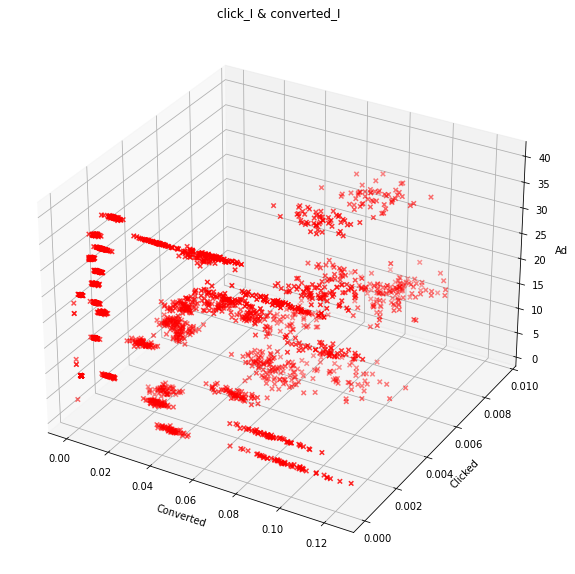

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111, projection = "3d")

x1 = data_c["click_I"]
x2 = data_c["converted_I"]
y = data_c["ad"]
plt.title("click_I & converted_I")

ax.set_xlabel("Converted")
ax.set_ylabel("Clicked")
ax.set_zlabel("Ad")

ax.scatter(x1, x2 , y , marker="x", c="red")

In [97]:
d2 = pd.DataFrame(((data_c["clicked"].values / data_c["shown"].values)),columns=["click_I"])
data_c=pd.concat([data_c,d2],axis=1)
data_c.head()
#Gösterilen reklamların tıklanma oranları dahil edebilmek için tıklanmayı gösterilme değerine böldüm ve sütun olarak ekledim.

<ipython-input-97-4b5f5ea29d55>:1: RuntimeWarning: invalid value encountered in true_divide
  d2 = pd.DataFrame(((data_c["clicked"].values / data_c["shown"].values)),columns=["click_I"])


,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,click_I
0,2015-10-01,65877,2339,43,0.90,641.62,1,0.035506
1,2015-10-02,65100,2498,38,0.94,756.37,1,0.038372
2,2015-10-03,70658,2313,49,0.86,970.90,1,0.032735
3,2015-10-04,69809,2833,51,1.01,907.39,1,0.040582
4,2015-10-05,68186,2696,41,1.00,879.45,1,0.039539


In [98]:
d3 = pd.DataFrame(((data_c["converted"].values / data_c["shown"].values)),columns=["converted_I"])
data_c=pd.concat([data_c,d3],axis=1)
data_c.head()
#Gösterilen reklamların geri dönüşleride önemli olduğu için converted değerini de gösterime bölüp sütun olarak ekledim.

<ipython-input-98-1aa51e77f7ed>:1: RuntimeWarning: invalid value encountered in true_divide
  d3 = pd.DataFrame(((data_c["converted"].values / data_c["shown"].values)),columns=["converted_I"])


,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,click_I,converted_I
0,2015-10-01,65877,2339,43,0.90,641.62,1,0.035506,0.000653
1,2015-10-02,65100,2498,38,0.94,756.37,1,0.038372,0.000584
2,2015-10-03,70658,2313,49,0.86,970.90,1,0.032735,0.000693
3,2015-10-04,69809,2833,51,1.01,907.39,1,0.040582,0.000731
4,2015-10-05,68186,2696,41,1.00,879.45,1,0.039539,0.000601


In [99]:
def normalize(t):
    t = (t - np.min(t)) / (np.max(t)- np.min(t))
    return t

In [102]:
data_c["total"] = normalize(data_c["total"])
data_c.head()
#eksilerden kurtulmak ve daha dengeli hale getrimek için total kısmını normalize ettim

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,click_I,converted_I,total
0,2015-10-01,65877,2339,43,0.90,641.62,1,0.035506,0.000653,0.786802
1,2015-10-02,65100,2498,38,0.94,756.37,1,0.038372,0.000584,0.785242
2,2015-10-03,70658,2313,49,0.86,970.90,1,0.032735,0.000693,0.792217
3,2015-10-04,69809,2833,51,1.01,907.39,1,0.040582,0.000731,0.780838
4,2015-10-05,68186,2696,41,1.00,879.45,1,0.039539,0.000601,0.782509


In [103]:
d4 = pd.DataFrame(((data_c["converted_I"].values + data_c["click_I"].values)),columns=["sum_I"])
data_c=pd.concat([data_c,d4],axis=1)
data_c.head()
#bulduğum tıklanma yoğunluğu ve convert yoğunluğunu topladım.sum_I sütununa ekledim

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,click_I,converted_I,total,sum_I
0,2015-10-01,65877,2339,43,0.90,641.62,1,0.035506,0.000653,0.786802,0.036158
1,2015-10-02,65100,2498,38,0.94,756.37,1,0.038372,0.000584,0.785242,0.038955
2,2015-10-03,70658,2313,49,0.86,970.90,1,0.032735,0.000693,0.792217,0.033429
3,2015-10-04,69809,2833,51,1.01,907.39,1,0.040582,0.000731,0.780838,0.041313
4,2015-10-05,68186,2696,41,1.00,879.45,1,0.039539,0.000601,0.782509,0.040140


In [21]:
d5 = pd.DataFrame()
d6 = pd.DataFrame()

In [22]:
for i in range(1,len(data_c["ad"])+1):
    d5= data_c.groupby('ad')["sum_I"].sum()
    d6= data_c.groupby('ad')["total"].sum()
#grup numaralarına göre totali ve toplam yoğunluğu topluyorum

In [23]:
data_New = pd.concat([d5,d6],axis=1)
data_New
#yeni datasetim 

,sum_I,total
ad,,
1,2.103215,41.417919
2,1.332832,43.306085
3,5.052545,15.147279
4,4.581022,34.819235
5,3.534751,40.598792
6,1.809050,41.503915
7,4.654397,37.164454
8,3.302553,39.954238
9,0.109402,42.638451


1-En iyi 5 reklam

Burada toplam yoğunluk yani "sum_I" niteliğinin en büyük olduğu reklam gruplarını buluyorum.

In [24]:
print(data_New.sort_values("sum_I",ascending=False).head(5))

       sum_I      total
ad                     
18  5.507417  36.964665
26  5.062996  36.436574
3   5.052545  15.147279
19  5.026260  40.455478
28  4.876197  40.939439


In [14]:
data_1 = data_c.query("ad == 1 ")[["date","shown"]]

In [89]:
y=data_1['shown'].values.reshape(-1,1)
x=data_1["date"].values.reshape(-1,1)

In [16]:
x.shape,y.shape

((53, 1), (53, 1))

In [21]:
x

array([['2015-10-01T00:00:00.000000000'],
       ['2015-10-02T00:00:00.000000000'],
       ['2015-10-03T00:00:00.000000000'],
       ['2015-10-04T00:00:00.000000000'],
       ['2015-10-05T00:00:00.000000000'],
       ['2015-10-06T00:00:00.000000000'],
       ['2015-10-07T00:00:00.000000000'],
       ['2015-10-08T00:00:00.000000000'],
       ['2015-10-09T00:00:00.000000000'],
       ['2015-10-10T00:00:00.000000000'],
       ['2015-10-11T00:00:00.000000000'],
       ['2015-10-12T00:00:00.000000000'],
       ['2015-10-13T00:00:00.000000000'],
       ['2015-10-14T00:00:00.000000000'],
       ['2015-10-15T00:00:00.000000000'],
       ['2015-10-16T00:00:00.000000000'],
       ['2015-10-17T00:00:00.000000000'],
       ['2015-10-18T00:00:00.000000000'],
       ['2015-10-19T00:00:00.000000000'],
       ['2015-10-20T00:00:00.000000000'],
       ['2015-10-21T00:00:00.000000000'],
       ['2015-10-22T00:00:00.000000000'],
       ['2015-10-23T00:00:00.000000000'],
       ['2015-10-24T00:00:00.00000

In [102]:
np.any(np.isnan(y))

False

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.fillna(0,inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
clean_dataset(data_New)

,ad,click_I,converted_I,total
0,1.0,0.035506,0.000653,0.786802
1,1.0,0.038372,0.000584,0.785242
2,1.0,0.032735,0.000693,0.792217
3,1.0,0.040582,0.000731,0.780838
4,1.0,0.039539,0.000601,0.782509
...,...,...,...,...
2110,40.0,0.016976,0.000474,0.795043
2111,40.0,0.017694,0.000426,0.797641
2112,40.0,0.017597,0.000462,0.792647
2113,40.0,0.018113,0.000488,0.791880


In [90]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=20)

In [91]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

2- Reklam grupları 15 Aralıkta kaç kez gösterilecek?

[[730725.13069026]]
<bound method RegressorMixin.score of LinearRegression()>


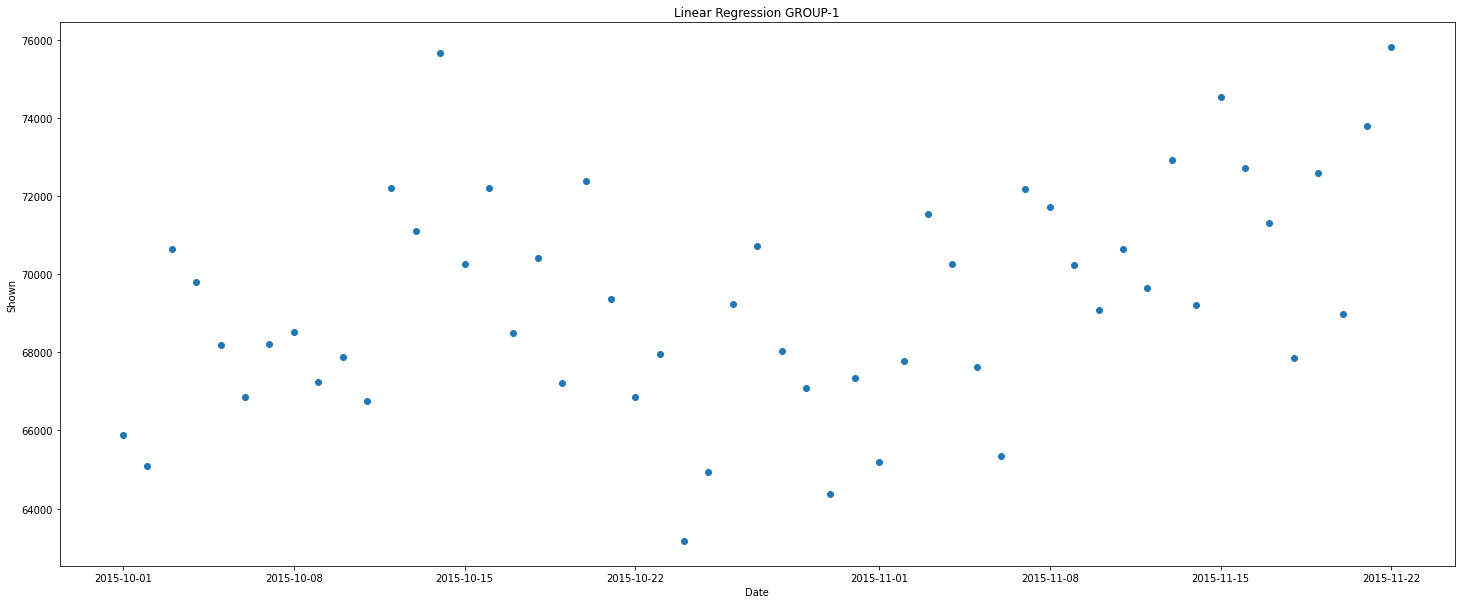

In [94]:
day_predict = pd.to_numeric(2015-12-15)
print(-1*lr_model.predict([[day_predict]]))
plt.figure(figsize=(25,10))
plt.scatter(x,y)
print(lr_model.score)
plt.title("Linear Regression GROUP-1")
plt.xlabel("Date")
plt.ylabel("Shown")


plt.show()

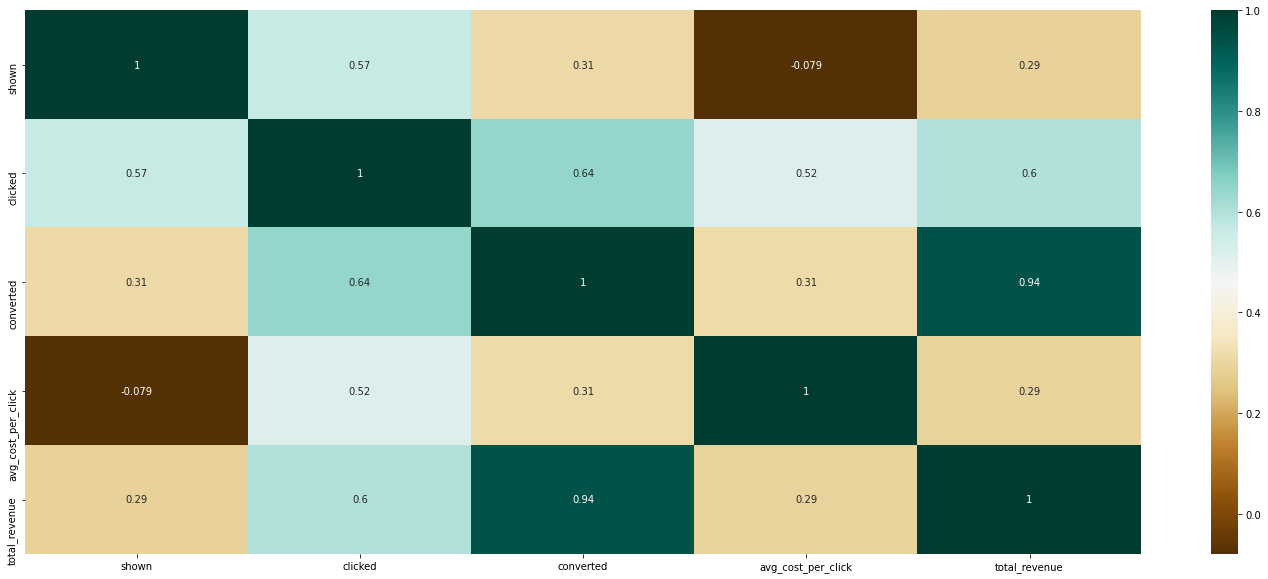

In [76]:
plt.figure(figsize=(25,10))
c = data_c.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
plt.show()

In [462]:
data_c= data.copy()
date_replace()
data_click = data_c.query("ad == 40")[["avg_cost_per_click","date","ad"]]
data_click['date'] = pd.to_datetime(data_click['date'])

<ipython-input-213-7abc5756024f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c["ad"][i] = 1
<ipython-input-213-7abc5756024f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c["ad"][i] = 2
<ipython-input-213-7abc5756024f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c["ad"][i] = 3
<ipython-input-213-7abc5756024f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

In [351]:
len(data_click["date"])

53

In [335]:
data_click["date"]

53    2015-10-01
54    2015-10-02
55    2015-10-03
56    2015-10-04
57    2015-10-05
58    2015-10-06
59    2015-10-07
60    2015-10-08
61    2015-10-09
62    2015-10-10
63    2015-10-11
64    2015-10-12
65    2015-10-13
66    2015-10-14
67    2015-10-15
68    2015-10-16
69    2015-10-17
70    2015-10-18
71    2015-10-19
72    2015-10-20
73    2015-10-21
74    2015-10-22
75    2015-10-23
76    2015-10-24
77    2015-10-25
78    2015-10-26
79    2015-10-27
80    2015-10-28
81    2015-10-29
82    2015-10-30
83    2015-10-31
84    2015-11-01
85    2015-11-02
86    2015-11-03
87    2015-11-04
88    2015-11-05
89    2015-11-06
90    2015-11-07
91    2015-11-08
92    2015-11-09
93    2015-11-10
94    2015-11-11
95    2015-11-12
96    2015-11-13
97    2015-11-14
98    2015-11-15
99    2015-11-16
100   2015-11-17
101   2015-11-18
102   2015-11-19
103   2015-11-20
104   2015-11-21
105   2015-11-22
Name: date, dtype: datetime64[ns]

In [342]:
list_analiz= []

In [343]:
def korelasyon_analiz():
    for i,row in data_click.iterrows():
        day = data_click["date"][i]   
        data_click["date"][i] = datetime.datetime.strftime(day, '%j')
            
    data_click["date"] = data_click["date"].astype("float")

    a = data_click["date"]
    b = data_click["avg_cost_per_click"]

    list_analiz.append(stats.pearsonr(a,b))

In [463]:
korelasyon_analiz()

<ipython-input-343-a49a1643a969>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_click["date"][i] = datetime.datetime.strftime(day, '%j')


In [464]:
list_analiz

[(0.20272996978015057, 0.1454286745091599),
 (-0.0015705491528599392, 0.9910948923085666),
 (0.15896554275897443, 0.2555640695399485),
 (-0.21820097075315215, 0.11650171383578746),
 (0.07174379350899983, 0.6096963622006827),
 (-0.24492512987804865, 0.07712859731587639),
 (-0.21614654201681746, 0.12006813490601169),
 (-0.3052723669264515, 0.02623086040683761),
 (0.10960960813916978, 0.4346257469578953),
 (-0.02484021117199693, 0.8612384792585369),
 (-0.21271740183738583, 0.12620493195375368),
 (-0.11141921175056578, 0.4270325453085985),
 (-0.015784063108433846, 0.9106833901282299),
 (-0.19406654311720076, 0.1680300418244199),
 (0.08749706830994113, 0.5332873156059568),
 (-0.03975451532100843, 0.7774622156722136),
 (-0.018735367442115014, 0.8940709816559972),
 (0.05636937952828861, 0.6914264694855641),
 (-0.28719527872495143, 0.03705963106545086),
 (0.24861237378863946, 0.07553397914125007),
 (0.030698027122492956, 0.8272675798319491),
 (-0.054968973381464066, 0.6958463320205097),
 (-0.0

Korelasyon katsayı değeri	Yorumu


-0.9 ile 1 veya -0.9 ile -1 arası	Çok kuvvetli doğrusal ilişki

-0.7 ile 0.9 veya -0.7 ile -0.9 arası	Kuvvetli doğrusal ilişki

-0.5 ile 0.7 veya -0.5 ile -0.7 arası	Orta kuvvetli doğrusal ilişki

-0.3 ile 0.5 veya -0.3 ile -0.5 arası	Düşük kuvvetli doğrusal ilişki

-0.0 ile 0.3 veya 0.0 ile -0.3 arası	Hiç ilişki yok veya çok düşük kuvvetli doğrusal ilişki

In [484]:
list_duz = []
list_pozitif= []
list_negatif= []
for i in range(0,40):
    if(list_analiz[i][0]< 0.3 ):
        list_duz.append(i+1)
    elif(list_analiz[i][0]>0.3):
        list_pozitif.append(i+1)
    elif(list_analiz[i][0]< 0.0 and list_analiz[i][0]> -0.3 ):
        list_negatif.append(i+1)
    

3-avg_cost_per_click sabit, artan ve azalan gruplandırması

In [485]:
list_duz#korelasyon katsayısı 0.3 ten ve -0.3 ten küçük olduğu için date ve avg arasında herhangi bir artış ilişkisi yok diyebilirim.

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

In [486]:
list_pozitif # korelasyon katsayısı 0.3ten büyük olduğu için date arttıkça avg_cost_per_click artmıştır diyebilirim.
#fakat bu artışın, korelasyon katsayı 0.37 olduğu için çokta güçlü bir artış olduğu söylenemez.

[40]

In [481]:
list_negatif # Azalan bir grup bulunamamıştır.

[]

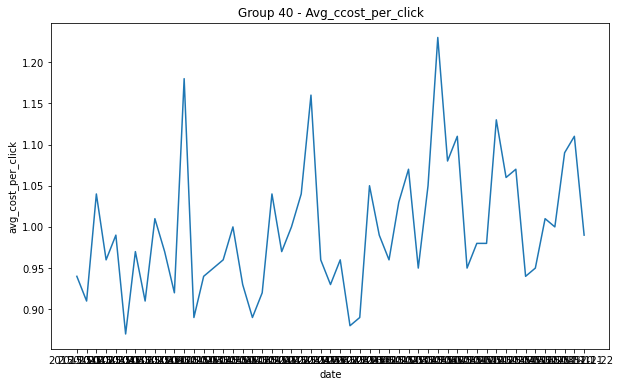

In [488]:
data_show = data_c.query("ad == 40")[["avg_cost_per_click","date","ad"]]
data1 = data_show.query("avg_cost_per_click > 0")
g=sns.lineplot(x="date", y="avg_cost_per_click", data=data1, legend="")
g.set_title("Group 40 - Avg_ccost_per_click")

plt.gcf().set_size_inches(10, 6)

plt.show()
#ad_group_40 için hafif artışın göründüğü lineplot

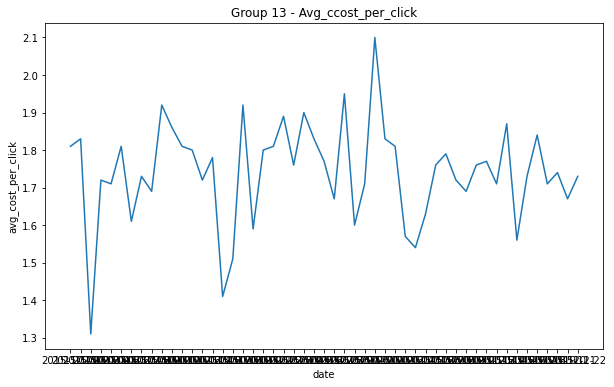

In [489]:
data_show = data_c.query("ad == 13")[["avg_cost_per_click","date","ad"]]
data1 = data_show.query("avg_cost_per_click > 0")
g=sns.lineplot(x="date", y="avg_cost_per_click", data=data1, legend="")
g.set_title("Group 13 - Avg_ccost_per_click")

plt.gcf().set_size_inches(10, 6)

plt.show()
#ad_group_13 için stabil durumun göründüğü lineplot